# A Manual of Instructional Problems for the U.S.G.S Modflow Model

# Problem 1: The Theis Solution

#### Part b
Because of symmetry, the aquifer domain can be represented as a quadrant. Set up a second model covering only the lower right quadrant of the previous domain. The grid spacing for this model is shown in Table 1.2. Position the well at the upper left comer of the new model, row 1, column 1. Because only one-fourth of the aquifer is simulated, the well discharge should also be reduced to one-fourth the original discharge. Run the model and note drawdown at each time step at an observation point 55 m from the pumping well.

### Table 1.2 Grid spacing used for Part b model configurations

| Row number (i) (=column number (j)) | Part b |
|-------------------------------------|--------|
| 1                                   | 20     |
| 2                                   | 30     |
| 3                                   | 30     |
| 4                                   | 40     |
| 5                                   | 60     |
| 6                                   | 80     |
| 7                                   | 100    |
| 8                                   | 150    |
| 9                                   | 200    |
| 10                                  | 300    |

In [40]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
#import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
#import csv

#paths for quick access
datapath = '../Data'

In [41]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table1.2_partb.csv') #opens the csv file
for i,line in enumerate(f): 
    if i == 0: #creates a statement that if i == 0 (if it's the first
        continue #row then it will skip it and move on with the for loop)
    linelist = line.strip().split(',') #line.strip gets rid of any extra spaces in the margins
                                       #split sections of the individual values according to whatever you put in the quotes
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
20.0
30.0
30.0
40.0
60.0
80.0
100.0
150.0
200.0
300.0
[20.0, 30.0, 30.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0]


In [42]:
#code for part b grid
%matplotlib inline
import sys
import os
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.11.3
matplotlib version: 2.0.0
flopy version: 3.2.6


[  20.   30.   30.   40.   60.   80.  100.  150.  200.  300.]
1010.0


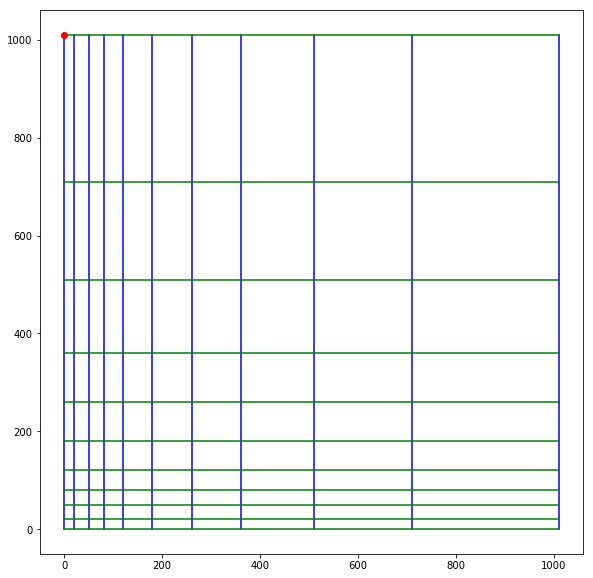

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0
x = 0
y = 0
xmean = delr_array.sum() * .5
ymean = delr_array.sum() * .5

plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line. Must be outside of the loop

for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymax, ymin], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line. Must be outside of the loop

for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')


def plot_well(xmin, ymax, sym):
    plt.plot(xmin, ymax, sym)
plot_well(xmin, ymax, sym='ro')

### Table 1.1 Parameters used in Problem 1b

| Variable  | Value   |
|----------------------------|-----------------|
| Initial head               | 0.0 m           |
| Transmissivity             | 0.0023 m^2/s    |
| Storage coefficient        | 0.00075         |
| Pumping rate               | 4 x 10^-3 * .25 m^3/s |
| Final time                 | 1010 s         |
| Number of time steps       | 10              |
| Time step expansion factor | 1.3             |
| SIP iteration parameters   | 5               |
| Closure criterion          | 0.0001          |
| Maximum number iterations  | 50              |

In [44]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
trans = 23.e-4 #transmissivity (is equal to hk*(top-botm))
ss = 0.00075 #storage coefficient
pr = 4.e-3 * .25 #pumping rate (multiplied by .25 because it's one-fourth the original aquifer is being simulated)
perlen = 86400 #final time (period length)
nstp = 10 #number of time steps
tsmult = 1.3 #time step expansion factor (time step multiplier)
sip_it_par = 5 #SIP iteration parameters
hclose = 1.e-4 #closure criterion (the head change criterion for convergence)
mxiter = 50 #maximum number of iterations
nlay = 1 #number of layers
nrow = 10 #number of rows
ncol = 10 #number of columns

#print values to make sure they are all stored properly
#put in quotes to make a string, .format takes whatever is in the () 
#and changes it to a float, it is then stored in the {}

print('initial head: {}'.format(inh))
print('transmissivity: {} m^2/s'.format(trans))
print('storage coefficient: {}'.format(ss))
print('pumping rate: {} m^3/s'.format(pr))
print('final time: {} s'.format(perlen))
print('number of time steps: {}'.format(nstp))
print('time step expansion factor: {}'.format(tsmult))
print('SIP iteration parameters: {}'.format(sip_it_par))
print('closure criterion: {}'.format(hclose))
print('maximum number of iterations: {}'.format(mxiter))


initial head: 0.0
transmissivity: 0.0023 m^2/s
storage coefficient: 0.00075
pumping rate: 0.001 m^3/s
final time: 86400 s
number of time steps: 10
time step expansion factor: 1.3
SIP iteration parameters: 5
closure criterion: 0.0001
maximum number of iterations: 50


In [45]:
#Flopy objects
modelname = 'p1_pb' #short for problem 1 part b
exe_name = '../MF2005.1_12/bin/mf2005.exe'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = modelname)

In [46]:
#call in the discretization package
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [47]:
#call in the basic package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [48]:
#call in the well package (WEL)
# Remember to use zero-based layer, row, column indices!
wel_sp1 = [[0, 0, 0, -pr]]
stress_period_data = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

In [49]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

In [66]:
#call in the layer-propery flow (LPF)
hk = trans
ss = 75e-5
laytyp = np.zeros((nlay))
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, laytyp=laytyp)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...


In [51]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf)

In [52]:
# Write the MODFLOW model input files
mf.write_input()

In [53]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p1_pb.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/06 11:16:48

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Grou

### Post processing the results
Now that we have successfully built and run our MODFLOW model, we can look at the results. MODFLOW writes the simulated heads to a binary data output file. We cannot look at these heads with a text editor, but flopy has a binary utility that can be used to read the heads. The following statements will read the binary head file and create a plot of simulated heads for layer 1:

In [54]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(modelname, 'p1_pb.hds')
headobj = bf.HeadFile(fname)
times = headobj.get_times()
print(times)

[2027.2417, 4662.6558, 8088.6938, 12542.543, 18332.547, 25859.551, 35644.656, 48365.293, 64902.117, 86399.992]


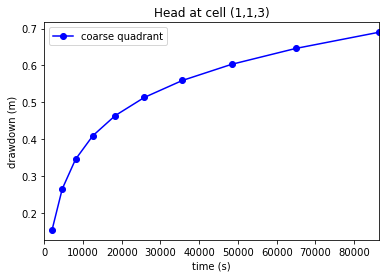

In [63]:
# Plot the drawdown versus time
idx = (0, 0, 2)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('drawdown (m)')
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-')
plt.xlim(0, ts[:, 0].max())
plt.legend(['coarse quadrant'], loc='best')

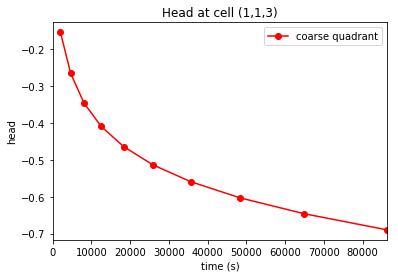

In [64]:
# Plot the head versus time
idx = (0, 0, 2)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('head')
plt.plot(ts[:, 0], ts[:, 1], 'ro-')
plt.xlim(0, ts[:, 0].max())
plt.legend(['coarse quadrant'], loc='best')

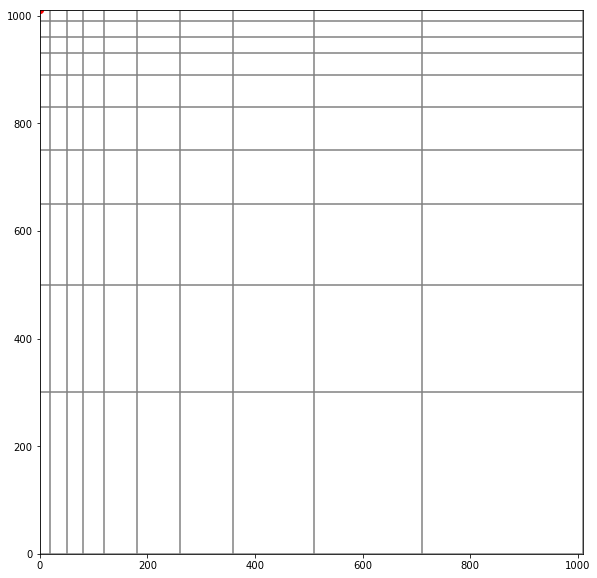

In [57]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
# Next we create an instance of the ModelMap class
modelmap = flopy.plot.ModelMap(sr=mf.dis.sr)

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
linecollection = modelmap.plot_grid()

def plot_well(xmin, ymax, sym):
    plt.plot(xmin, ymax, sym)
plot_well(xmin, ymax, sym='ro')